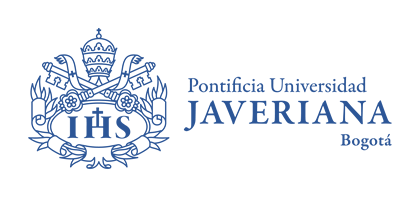

# Aprendizaje de máquina - Ejercicio k-means
El objetivo de este notebook es familiarizar al estudiante con el algoritmo k-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances


## Creación de un dataset aleatorio

Vamos a crear inicialmente un dataset sobre el cuál vamos a trabajar, vamos a trabajar inicialmente con puntos tomados de 3 distribuciones normales con parámetros diferentes.

In [2]:
# Centros de la distribución 1 sobre cada dimensión
means_1 =[0,0,0]
# Matriz de covarianza 1
cov_1=[[0.1,0,0],[0,0.1,0],[0,0,0.1]]
X1=np.random.multivariate_normal(means_1,cov_1,500)
print(X1.shape)
# Centros de la distribución 2 sobre cada dimensión
means_2 =[1,1,1]
# Matriz de covarianza 2
cov_2=[[0.2,0,0],[0,0.2,0],[0,0,0.2]]
X2=np.random.multivariate_normal(means_2,cov_2,500)
print(X2.shape)

# Centros de la distribución 3 sobre cada dimensión
means_3 =[-1,-1,-1]
# Matriz de covarianza 2
cov_3=[[0.25,0,0],[0,0.25,0],[0,0,0.25]]
X3=np.random.multivariate_normal(means_3,cov_2,500)
print(X3.shape)

(500, 3)
(500, 3)
(500, 3)


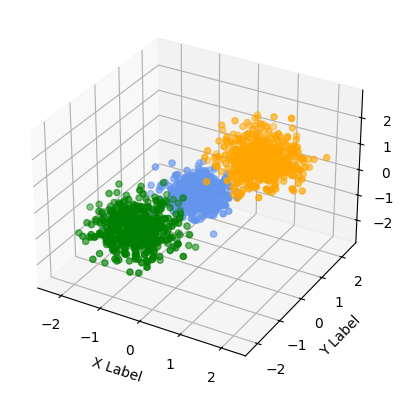

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1[:,0], X1[:,1], X1[:,2], c='cornflowerblue')
ax.scatter(X2[:,0], X2[:,1], X2[:,2], c='orange')
ax.scatter(X3[:,0], X3[:,1], X3[:,2], c='green')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [7]:
# concatenamos los 3 datasets y los "desordena"
X=np.concatenate([X1,X2,X3])
np.random.shuffle(X)

In [8]:
X.shape

(1500, 3)

Text(0.5, 0, 'Z Label')

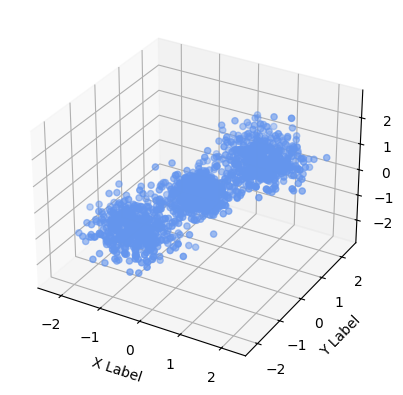

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c='cornflowerblue')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Recordemos los pasos que debemos seguir para implementar K-means


1.   Inicializar los centroides representantes de cada grupo aleatoriamente
2.   Asignar cada instancia al cluster cuyo centroide sea el más cercano
3.   Actualizar los centroides
4.   Repetir hasta convergencia





## Inicialización centroides

Comencemos con la implementación de funciones para solucionar subproblemas. La primera función que vamos a definir es la inicialización de los centroides. Los puntos creados aleatoriamente deberían estar entre el mínimo y máximo de los datos conocidos en cada dimensión. Para definir la función `init_centroids` se puede apoyar de los siguientes fragmentos de código:

In [10]:
# Valores mínimos en cada dimensión
min_vals=np.min(X,axis=0)
print(min_vals)

[-2.28008434 -2.19271581 -2.53521447]


In [11]:

# Valores máximos en cada dimensión
max_vals=np.max(X,axis=0)
print(max_vals)

[2.24530974 2.38390205 2.66807409]


In [12]:
# Creación de 10 instancias aleatorias entre los límites mínimo y máximo
np.random.uniform(low=min_vals,high=max_vals, size=(10,len(min_vals)))

array([[-0.84454059, -0.57766262, -0.28598659],
       [-2.01577997,  2.27316578,  2.63566288],
       [-1.02331888, -0.47104695,  1.75588554],
       [ 1.63202778, -0.73685006,  0.56914364],
       [ 0.06703035, -0.36111328,  1.47820954],
       [ 1.81345571, -1.16215911,  1.20315884],
       [ 1.59541392, -0.99572584, -0.98470641],
       [-2.1847903 , -1.71273939,  1.56914612],
       [ 1.79258346, -2.12382848, -0.65380632],
       [ 0.04919885, -0.71869217, -1.34896815]])

In [16]:
# TODO: Implemente la siguiente función
def init_centroids(X,k):
  """
    Retorna una matriz numpy de tamaño (k,len(X[1]))
    con puntos aleatorios.
  
  
    Parameters:
    X: Matriz de instancias x características
    k: número de centroides a generar

    Returns:
    np.array Matriz de centroides.
  
  """
  centroids = np.random.uniform(low= np.min(X, axis=0), high=np.max(X, axis=0), size=(k, len(X[1])))
  return centroids

    

In [17]:
X[1]

array([0.45028902, 1.46231222, 0.52803156])

In [18]:
# Correr para verificar
result=init_centroids(X,4)
print(result)
assert(result.shape==(4,X.shape[1]))
assert(np.all(X.min(axis=0)<=result.min(axis=0)))
assert(np.all(X.max(axis=0)>=result.max(axis=0)))

[[-0.67224274  2.15497503  1.89240256]
 [ 1.61651391  0.70851501  0.67912271]
 [-0.52017995  1.84751746 -1.37448967]
 [ 2.126871   -0.527805    0.56742291]]


## Asignación de puntos a cluster

Una vez inicializados los centroides, debemos establecer una forma para asignar cada instancia al centroide más cercano. 

Al trabajar con datos es importante evitar al máximo iterar sobre los datos.

El algoritmo imperativo clásico para resolver este problema es cuadrático 

```python
for i in X:
  dist_i = np.inf
  c_id= None
  for id, j in centroids:
    if dist(i,j) < dist_i:
      dist_i=dist(i,j)
      c_id=id
```

Para definir la función `closest_point` se puede apoyar de los siguientes fragmentos de código:

In [ ]:
# Definimos matriz con 4 puntos para ejemplo
o1= np.array( [[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
print(o1)
# Definimos matriz con 2 centroides para ejemplo
cent=np.array([[1.5,1.5,1.5],[3.5,3.5,3.5]])
print(cent)



In [ ]:
# La función pariwise distances de sklearn permite comparar eficientemente las distancias entre los puntos de las 2 matrices
distances=pairwise_distances(o1,cent, metric='euclidean')
# El resultado es una matriz de distancias entre o1 y cada instancia de o2
distances


In [ ]:
# Al llamar matriz.min(axis=1) obtenemos por cada punto qué distancia fue la menor

distances.min(axis=1)

In [ ]:
# Al llamar matriz.argmin(axis=1) nos dice en qué coordenada esta el punto cuya distancia es mínima

distances.argmin(axis=1)

In [ ]:
# TODO: Implemente la siguiente función
def closest_point(X,centroids):
  """
    Retorna una tupla donde la primera coordenada contiene un arreglo numpy con 
    el identificador del punto más cercano de cada instancia a alguno de los 
    centroides y la segunda tupla contiene un arreglo numpy con la distancia al 
    identificador del punto más cercano
  
  
    Parameters:
    X: Matriz de instancias x características
    centroids: puntos centroides identificados

    Returns:
    tuple:  Posición 0, identificadores de punto más cercano
            Posición 1, distancias a los puntos
  """
  ?


In [ ]:
# Correr para verificar
from math import isclose

o_test= np.array( [[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
cent_test=np.array([[1,1,1],[4,4,4]])
ids,dist=closest_point(o_test,cent_test)
assert((ids==[0,0,1,1]).all())
assert(dist[0]==0)
assert(isclose(dist[1],1.73205081,abs_tol=0.0001))
assert(isclose(dist[2],1.73205081,abs_tol=0.0001))
assert(dist[3]==0)

## Recalcular centroides

Una vez asignado cada punto a un centroide, hay que recalcular los centroides.

Revise los siguientes segmentos de código para completar la función solicitada

Aunque no es lo más eficiente, podemos solucionar rápidamente este problema utilizando pandas y la función groupby

In [ ]:
X_pandas=pd.DataFrame(X)

In [ ]:
X_pandas

In [ ]:
# Asignación aleatoria en 3 labels de los datos
X_pandas['label']=np.random.randint(1, 4, X_pandas.shape[0]) 

In [ ]:
X_pandas.groupby('label').mean()

In [ ]:
# Para obtener de nuevo la matriz puede llamar values sobre el dataframe
X_pandas.groupby('label').mean().values

In [ ]:
# TODO: Implemente la siguiente función
def new_centers(X,labels):
  """
    Retorna matriz numpy con los nuevos centroides, dada la asignación de cada punto a un cluster
  
  
    Parameters:
    X: Matriz de instancias x características
    labels: instancias asignadas

    Returns:
    np.array:  Matriz con los nuevos centroides
  """
 ?

In [ ]:
# Correr para verificar
from math import isclose

o_test= np.array( [[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
cent_test=np.array([[1,1,1],[4,4,4]])
ids,dist=closest_point(o_test,cent_test)
centers=new_centers(o_test,ids)
assert((centers[0]==[1.5,1.5,1.5]).all())
assert((centers[1]==[3.5, 3.5, 3.5]).all())

# Implementación k-means

Una vez implementadas estas tres funciones, podemos verificar cómo funciona k-means

In [ ]:
# Busquemos 2 centroides iniciales
centroides_iniciales=init_centroids(X,2)

In [ ]:
print(centroides_iniciales)

In [ ]:
#asignación de puntos a centroides
labels, distancias=closest_point(X,centroides_iniciales)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels,cmap='viridis')
ax.scatter(centroides_iniciales[:, 0], centroides_iniciales[:, 1], centroides_iniciales[:,2], c='black',s=200)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
centroides_nuevos=new_centers(X, labels)


In [ ]:
#asignación de puntos a centroides
nuevos_labels, distancias=closest_point(X,centroides_iniciales)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=nuevos_labels,cmap='viridis')
ax.scatter(centroides_nuevos[:, 0], centroides_nuevos[:, 1], centroides_nuevos[:,2], c='black',s=200)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Ejercicio:

Terminar el ejericio de implementación de k-means

Reflexione sobre las siguientes preguntas para su implementación:
  ¿Cúantas veces tenemos que repetir la asignación?
  ¿Cómo determinar que ya finalizamos?